In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.utils import pad_sequences
from keras.callbacks import EarlyStopping
%matplotlib inline

LSTM model from https://www.kaggle.com/code/kredy10/simple-lstm-for-text-classification

Bidirectional LSTM model from https://keras.io/examples/nlp/bidirectional_lstm_imdb/ and 

https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/

In [2]:
train_data = pd.read_csv('final_data/train.csv')
test_data = pd.read_csv('final_data/test.csv')
# split train_data to X_train and y_train
X_train = train_data['review']
y_train = train_data['rating']
# split test_data to X_test and y_test
X_test = test_data['review']
y_test = test_data['rating']
# split validation_data to X_val and y_val
X_val = test_data['review']
y_val = test_data['rating']

In [3]:
max_words = 10000 # considering only top 10000 words
max_len = 200 # considering only first 200 words of each review
tok = Tokenizer(num_words=max_words)
# fit the tokenizer on X_train 
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
X_train = pad_sequences(sequences,maxlen=max_len)
# fit the tokenizer on X_val
tok.fit_on_texts(X_val)
sequences = tok.texts_to_sequences(X_val)
X_val = pad_sequences(sequences,maxlen=max_len)

In [41]:
# bidirectional LSTM 
def biLSTM():
    # Input for variable-length sequences of integers
    inputs = Input(shape=(None,), dtype="int32")
    # Embed each integer in a 128-dimensional vector
    x = Embedding(max_words, 128)(inputs)
    # Add 2 bidirectional LSTMs
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = Bidirectional(LSTM(64))(x)
    # Add a classifier
    outputs = Dense(1, activation="sigmoid")(x)
    model = Model(inputs, outputs)
    return model
    
biLSTM_model = biLSTM()
biLSTM_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_6 (Embedding)     (None, None, 128)         1280000   
                                                                 
 bidirectional_6 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,477,761
Trainable params: 1,477,761
Non-tra

In [42]:
biLSTM_model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
biLSTM_model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/100
2269/2269 [==============================] - 82s 34ms/step - loss: 0.3727 - accuracy: 0.8378 - val_loss: 0.6431 - val_accuracy: 0.7046
Epoch 2/100
2269/2269 [==============================] - 76s 33ms/step - loss: 0.2796 - accuracy: 0.8847 - val_loss: 0.6874 - val_accuracy: 0.7043
Epoch 3/100
2269/2269 [==============================] - 76s 33ms/step - loss: 0.2241 - accuracy: 0.9106 - val_loss: 0.7873 - val_accuracy: 0.6981
Epoch 4/100
2269/2269 [==============================] - 76s 33ms/step - loss: 0.1788 - accuracy: 0.9319 - val_loss: 0.8672 - val_accuracy: 0.7040


In [12]:
# simple RNN structure for LSTM
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [23]:
# call and compile the model
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_4 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

In [1]:
model.fit(X_train,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

NameError: name 'model' is not defined

In [ ]:
# test the model
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)
accr = model.evaluate(test_sequences_matrix,y_test)

In [43]:
# evalute biLSTM model
accr = biLSTM_model.evaluate(test_sequences_matrix,y_test)

1681/1681 [==============================] - 21s 13ms/step - loss: 0.8681 - accuracy: 0.7037


In [6]:
# evalute biLSTM model
accr = biLSTM_model.evaluate(test_sequences_matrix,y_test)

NameError: name 'model' is not defined

In [19]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.388
  Accuracy: 0.829


In [3]:
# look at distribution of rating
def look_at_rating(train_csv):
    # read train csv file
    df = pd.read_csv(train_csv)
    # look at distribution of rating
    print(df['rating'].value_counts())
    # plot distribution of rating
    df['rating'].value_counts().plot(kind='bar')
    plt.show()

1    101851
0     43316
Name: rating, dtype: int64


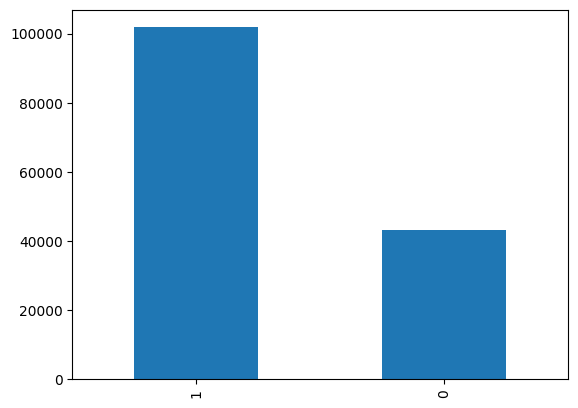

In [4]:
look_at_rating('final_data/train.csv')

1    11358
0     4772
Name: rating, dtype: int64


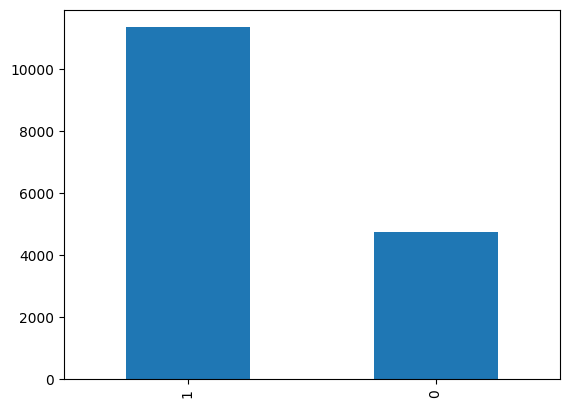

In [5]:
look_at_rating('final_data/valid.csv')

1    37559
0    16207
Name: rating, dtype: int64


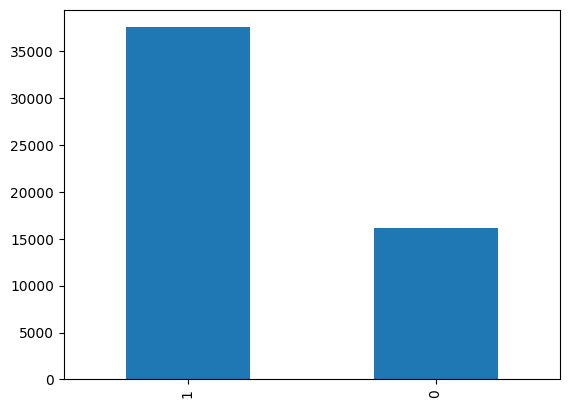

In [6]:
look_at_rating('final_data/test.csv')